# DAND Project 2: Investigating a movie database
#### By: Deepak Nandipati

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Overview:
> I will be analyzing the TDMB Database that was provided from Kaggle. This dataset contains more than 10,000 datapoints and it includes basic movie information such as user ratings, revenue, budget etc. 

### Questions I will be analyzing from this database:
>#### 1. Has the budget been increasing with time? Plot the graph
>#### 2. What are the most and least profitable movies? Formula of Profit = Revenue - Budget
>#### 3. Have movies been getting popular with time? Plot the graph 
>#### 4. What are the top 10 budgeted movies? Plot the graph
>#### 5. What are the most succesful genres in TMDB. Plot the graph.
>#### 6. Identify the top 5 directors according to the popularity of the movies and how many movies have they made?

### Importing Packages needed for Data Analysis

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

<a id='wrangling'></a>
## Data Wrangling


#### Use pandas to read the CSV file given

In [55]:
#importing the CSV file that was originally from Kaggle open projects
df = pd.read_csv("tmdb-movies.csv") 

In [56]:
df.head(1) #observing the initial data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [57]:
df.shape #determining how big the data is

(10866, 21)

## Data Cleaning Steps:

### 1. Delete Duplicate columns to avoid any repetition of data and for more accurate statistics
### 2. Delete unwanted columns, and keep only columns that are useful in answering research questions. This way the data can be easily read and understood.
### 3. Replace the zeroes of column 'budget' and 'revenue' with null values
### 4. Fill null values where needed for remaining data or Drop the null values if present in small numbers

In [58]:
df.info(); #looking for null columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

---

#### 1. Deleting duplicate columns

In [59]:
df.drop_duplicates(inplace=True) #remember to always use (inplace=True) as this will secure the changes 

In [60]:
df.shape #indicates that 1 duplicate row has been deleted 10866 to 10865 now

(10865, 21)

#### 2. Deleting unnecessary columns

In [61]:
#dropping unecessary columns as originally this dataset has 21 columns; cleaning data for easier and better access
to_drop = ['cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_average', 'budget_adj', 'revenue_adj']
df.drop(to_drop, axis=1, inplace=True)

In [62]:
df.head(1) #verifiying if the columns have been dropped

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,2015


#### 3. Replacing zeroes with null values

In [63]:
#The code below shows us how many zeroes we are working with in this dataset. 
df_budget = df['budget'] == 0
df_revenue = df['revenue'] == 0

In [64]:
# There are a lot of zeroes in our dataset for budget and revenue, and this shows us that the value is merely missing
# rather than it actually be zeroing. For the sake of data accuracy, we must keep these and replace them with null values
# as Zero values can distort the values

df_budget.sum(), df_revenue.sum() 

(5696, 6016)

In [65]:
df['budget'] = df['budget'].replace(0, np.NAN)
(df['budget'] == 0).sum() #this verifies that the zeroes are not in the columns anymore

0

In [66]:
df['revenue'] = df['revenue'].replace(0, np.NAN)
(df['revenue'] == 0).sum() #this verifies that the zeroes are not in the columns anymore

0

In [67]:
df['budget'].count()

5169

#### 4. Fill or Drop null values 

In [68]:
df.isnull().sum()
#displays all the null values present in Data; Budget and Revenue have already been taken care of
#Remaining is imdb_id, director, genres

id                   0
imdb_id             10
popularity           0
budget            5696
revenue           6016
original_title       0
director            44
runtime              0
genres              23
release_date         0
vote_count           0
release_year         0
dtype: int64

##### &nbsp;&nbsp;&nbsp; Assessing 'imdb_id'

In [69]:
df[df['imdb_id'].isnull()].head(5)
#from this dataset we can see that the budget, revenue, and most of directors are also missing values. It would be
#wiser to drop this dataset rather.

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,release_year
548,355131,NaN,0.108072,NaN,NaN,Sense8: Creating the World,NaN,25,Documentary|Science Fiction,8/10/15,12,2015
997,287663,NaN,0.330431,NaN,NaN,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,44,NaN,10/3/14,13,2014
1528,15257,NaN,0.607851,NaN,NaN,Hulk vs. Wolverine,Frank Paur,38,Animation|Action|Science Fiction,1/27/09,38,2009
1750,101907,NaN,0.256975,NaN,NaN,Hulk vs. Thor,Sam Liu,41,Action|Animation|Fantasy|Science Fiction,1/27/09,38,2009
2401,45644,NaN,0.067753,NaN,NaN,Opeth: In Live Concert At The Royal Albert Hall,NaN,163,Music,9/21/10,10,2010


##### &nbsp;&nbsp;&nbsp; Assessing 'director'

In [70]:
df[df['director'].isnull()].head(5)
#from this dataset we can see that the budget, revenue are also missing values. It would be
#wiser to drop this dataset rather.

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,release_year
532,320996,tt4073952,0.126594,NaN,NaN,Iliza Shlesinger: Freezing Hot,NaN,71,Comedy,1/23/15,14,2015
548,355131,NaN,0.108072,NaN,NaN,Sense8: Creating the World,NaN,25,Documentary|Science Fiction,8/10/15,12,2015
556,321160,tt3908634,0.100910,NaN,NaN,With This Ring,NaN,105,Comedy|Romance,1/24/15,14,2015
1032,259910,tt3591568,0.291253,NaN,NaN,Marvel Studios: Assembling a Universe,NaN,43,TV Movie|Documentary,3/18/14,32,2014
1054,253675,tt3711030,0.269468,NaN,NaN,Unlocking Sherlock,NaN,60,TV Movie|Documentary,1/19/14,11,2014


##### &nbsp;&nbsp;&nbsp; Assessing 'genres'

In [71]:
df[df['genres'].isnull()].head(5)
#from this dataset we can see that the budget, revenue are also missing values. It would be
#wiser to drop this dataset rather.


,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,release_year
424,363869,tt4835298,0.244648,NaN,NaN,Belli di papÃ,Guido Chiesa,100,NaN,10/29/15,21,2015
620,361043,tt5022680,0.129696,NaN,NaN,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,10/6/15,13,2015
997,287663,NaN,0.330431,NaN,NaN,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,44,NaN,10/3/14,13,2014
1712,21634,tt1073510,0.302095,NaN,NaN,Prayers for Bobby,Russell Mulcahy,88,NaN,2/27/09,57,2009
1897,40534,tt1229827,0.020701,NaN,NaN,Jonas Brothers: The Concert Experience,Bruce Hendricks,76,NaN,2/27/09,11,2009


In [72]:
col_todrop=['genres','director', 'imdb_id']
df.dropna(subset = col_todrop, inplace = True)

In [73]:
df.isnull().sum() #verifying if null values are dropped

id                   0
imdb_id              0
popularity           0
budget            5632
revenue           5947
original_title       0
director             0
runtime              0
genres               0
release_date         0
vote_count           0
release_year         0
dtype: int64

### Final evaluation of Data before analysis

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10795 entries, 0 to 10865
Data columns (total 12 columns):
id                10795 non-null int64
imdb_id           10795 non-null object
popularity        10795 non-null float64
budget            5163 non-null float64
revenue           4848 non-null float64
original_title    10795 non-null object
director          10795 non-null object
runtime           10795 non-null int64
genres            10795 non-null object
release_date      10795 non-null object
vote_count        10795 non-null int64
release_year      10795 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 1.1+ MB


In [75]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,release_year
count,10795.000000,10795.000000,5.163000e+03,4.848000e+03,10795.000000,10795.000000,10795.000000
mean,65560.482446,0.649617,3.077286e+07,8.925500e+07,102.214266,218.691709,2001.285966
std,91751.943252,1.002631,3.891469e+07,1.620930e+08,30.764036,577.283167,12.821353
min,5.000000,0.000188,1.000000e+00,2.000000e+00,0.000000,10.000000,1960.000000
25%,10568.000000,0.209190,6.000000e+06,7.724244e+06,90.000000,17.000000,1995.000000
50%,20453.000000,0.385492,1.700000e+07,3.187604e+07,99.000000,39.000000,2006.000000
75%,74684.000000,0.717850,4.000000e+07,9.997431e+07,112.000000,147.000000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,2015.000000


In [76]:
test = sorted(df['popularity'], reverse=True)
test[:5], test[-5:]

([32.985763, 28.419936, 24.949134, 14.311205, 13.112507],
 [0.001117, 0.001115, 0.000973, 0.00062, 0.000188])

##### Observances from general statistics:
-  Popularity column looks to have an outlier as the mean of data is only 0.64 but upon further investigation, it shows that the number is more of a cumulative concept. For that reason, it is best to leave the original data.
-  Runtime appears to be 0, which is a problem as movies need to be greater than 0; we need to drop the zero values 
   or fill them with appropriate data
-  the remaining data seems to be fine for further analysis

##### Replace the zero values of 'runtime'  with mean runtime value

In [77]:
df_revenue = df['runtime'] == 0  #we only have 28 values that constitute to zero runtime, we can remove these values
df_revenue.sum() 

28

In [78]:
df.query('runtime != 0', inplace = True) #dropping non-zero columns

In [79]:
df.describe() #problems have been rectified

,id,popularity,budget,revenue,runtime,vote_count,release_year
count,10767.000000,10767.000000,5.160000e+03,4.848000e+03,10767.000000,10767.000000,10767.000000
mean,65266.425745,0.650805,3.078857e+07,8.925500e+07,102.480078,219.205907,2001.261911
std,91448.107023,1.003509,3.892052e+07,1.620930e+08,30.358597,577.944627,12.827140
min,5.000000,0.000188,1.000000e+00,2.000000e+00,2.000000,10.000000,1960.000000
25%,10556.000000,0.210087,6.000000e+06,7.724244e+06,90.000000,17.000000,1995.000000
50%,20391.000000,0.386180,1.700000e+07,3.187604e+07,99.000000,39.000000,2006.000000
75%,74424.000000,0.719086,4.000000e+07,9.997431e+07,112.000000,147.500000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,2015.000000


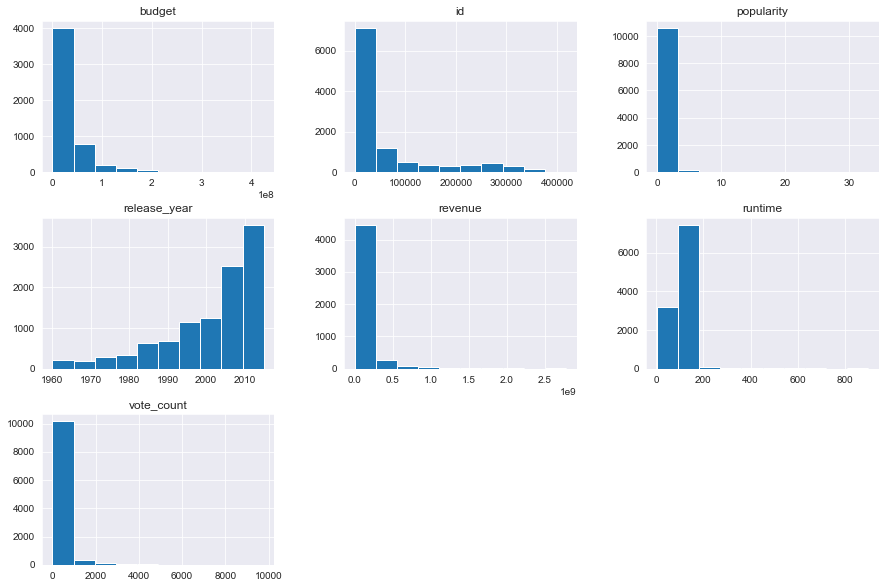

In [80]:
df.hist(figsize=(15,10)); 
#observing the data for any outliers or data that needs to be cleaned further; we can make assumptions about our data 
#even prior to making changes

## Data Extraction and Analysis

## Questions I will be analyzing from this database:
>### 1. Has the budget been increasing with time? Plot the graph
>### 2. What are the most and least profitable movies? Formula of Profit = Revenue - Budget
>### 3. Have movies been getting popular with time? Plot the graph 
>### 4. What are the top 10 budgeted movies? Plot the graph
>### 5. What are the most succesful genres in TMDB. Plot the graph.
>### 6. Identify the top 5 directors according to the popularity of the movies and how many movies have they made?

---

### Question 1. Has the budget been increasing with time? Plot the graph
### we use the groupby function to group the release years and find the mean budget for each year. With that data, we can then graph the values and observe the trend

In [81]:
#Question 1. Has the budget been increasing with time? Plot the graph

budget_year = df.groupby('release_year').mean()['budget']
budget_year[:3],budget_year[-3:] #displaying the first 3 and last 3 mean values of budget according to year; 

(release_year
 1960    2.450772e+06
 1961    3.549000e+06
 1962    3.908723e+06
 Name: budget, dtype: float64, release_year
 2013    3.418903e+07
 2014    3.384868e+07
 2015    3.617404e+07
 Name: budget, dtype: float64)

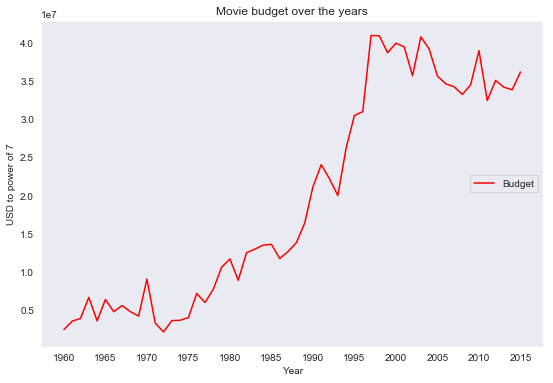

In [82]:
#plotting according to the new variable created above, the label states that budget is in American dollars
plt.figure(figsize=(9, 6))
plt.plot(budget_year, color = 'r', label = 'Budget')

#used xticks here to create intervals of 30 years at a time
plt.xticks(np.arange(min(df['release_year']), max(df['release_year'])+5, 5.0))

#displaying labels appropriately
plt.title('Movie budget over the years')
plt.xlabel('Year')
plt.ylabel('USD to power of 7')
#set legend located to right
plt.legend(loc='right');

### Plot indicates that the budget has been increasing drastically over the years. It shows that there was a drastic increase in budgets of the movies from the 1995 period. Within the span of 1995 to 2000 it has shown to increase almost double. The pattern of budget increases seems to hit almost a plateau after the 2000s with minimal changes in budget averages per year. Further information is needed to accurately predict any surges in future budgets.

---

### Question 2. What are the most and least profitable movies? Formula of Profit = Revenue - Budget
### we need to first create a column for profit and then create a def function highlighting lowest and most profit based on year; this function can be re-used for other variables also

In [83]:
#lets first start by creating profit column so it can be easily accessible and displayed for further calculations
df['profit'] = df['revenue'] - df['budget']

In [84]:
#we can use the define function to calculate the least and most values of our data; function can be versatile and be used
#to other variables also

def low_high(column_name): #definining function
    
    #lets start with the least profit
    #least_id will take the lowest value from row and record its id
    least_id = df[column_name].idxmin()
    #df.loc function will display values of the id; we can store it in variable
    #and concat the rest
    low_details = pd.DataFrame(df.loc[least_id])
    
    highest_id = df[column_name].idxmax() #same method as above for high details
    high_details = pd.DataFrame(df.loc[highest_id])
    
    #combining the low and high values together, axis needs to be one
    #as we are concating through columns rather than indexes
    combined_data = pd.concat([low_details, high_details], axis = 1)
    
    return combined_data

#lets test the function
low_high('profit')

,2244,1386
id,46528,19995
imdb_id,tt1032751,tt0499549
popularity,0.25054,9.43277
budget,4.25e+08,2.37e+08
revenue,1.10876e+07,2.78151e+09
original_title,The Warrior's Way,Avatar
director,Sngmoo Lee,James Cameron
runtime,100,162
genres,Adventure|Fantasy|Action|Western|Thriller,Action|Adventure|Fantasy|Science Fiction
release_date,12/2/10,12/10/09


### Data indicates that the least profitable movie was the "The Warrior's Way" that was directed by Sngmoo Lee in 2010. It did not make any profit and thus the negative value. The most profitable movie is the "Avatar", directed by James Cameron in 2009. It has a net profit of 2.5 billion USD dollars. 

---

### Question 3. Have movies been getting popular with time? Plot the graph 

In [85]:
#Have movies been getting popular with time? Plot the graph
pop_year = df.groupby('release_year').mean()['popularity']
pop_year[:3],pop_year[-3:]

(release_year
 1960    0.458932
 1961    0.422827
 1962    0.454783
 Name: popularity, dtype: float64, release_year
 2013    0.637482
 2014    0.895706
 2015    1.045042
 Name: popularity, dtype: float64)

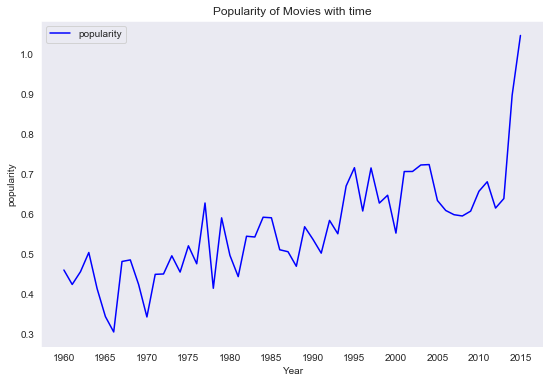

In [86]:
#plotting according to the new variable created above, the label states that budget is in American dollars
plt.figure(figsize=(9, 6))
plt.plot(pop_year, color = 'b', label = 'popularity')

#used xticks here to create intervals of 30 years at a time
plt.xticks(np.arange(min(df['release_year']), max(df['release_year'])+5, 5.0))

#displaying labels appropriately
plt.title('Popularity of Movies with time')
plt.xlabel('Year')
plt.ylabel('popularity')
#set legend located to right
plt.legend(loc='upper left');

#### Lets also plot profit per year for reference

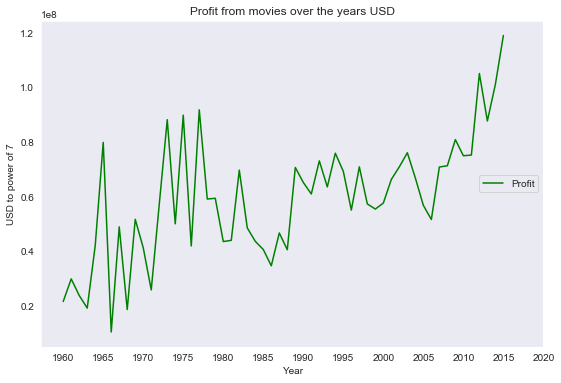

In [87]:
profit_year = df.groupby('release_year').mean()['profit']
#plotting according to the new variable created above, the label states that budget is in American dollars
plt.figure(figsize=(9, 6))
plt.plot(profit_year, color = 'g', label = 'Profit')

#used xticks here to create intervals of 30 years at a time
plt.xticks(np.arange(min(df['release_year']), max(df['release_year'])+8, 5.0))

#displaying labels appropriately
plt.title('Profit from movies over the years USD')
plt.xlabel('Year')
plt.ylabel('USD to power of 7')
#set legend located to right
plt.legend(loc='right');

### It appears that the popularity of the movies have been increasing slowly with time, but after 2010 period there was a drastic surgency in popularity. When we also plot the graph for profit over the years, we can see that the profits of movie also had a surgency after the 2010 period. Which indicates that the popularity of movies has a direct correlation with the profit of the movies. 

---

### Question 4. What are the top 10 budgeted movies? Plot the graph

In [88]:
#Budget of movies are arranged from highest to lowest
top10 = pd.DataFrame(df['budget'].sort_values(ascending = False)) 
#make the new dataframe equal to existing dataframe so the titles match the budgets of movies
top10['original_title'] = df['original_title']

In [89]:
#lets define X and Y value for plotting
title = top10['original_title'][:10] #we are extracting the first 10 movie titles
top = top10['budget'][:10] #we are extracting top 10 budgets for films


In [90]:
combined = pd.concat([title, top], axis = 1) #displays the top 10 budgeted movies
combined

,original_title,budget
2244,The Warrior's Way,425000000.0
3375,Pirates of the Caribbean: On Stranger Tides,380000000.0
7387,Pirates of the Caribbean: At World's End,300000000.0
14,Avengers: Age of Ultron,280000000.0
6570,Superman Returns,270000000.0
4411,John Carter,260000000.0
1929,Tangled,260000000.0
7394,Spider-Man 3,258000000.0
5508,The Lone Ranger,255000000.0
643,X-Men: Days of Future Past,250000000.0


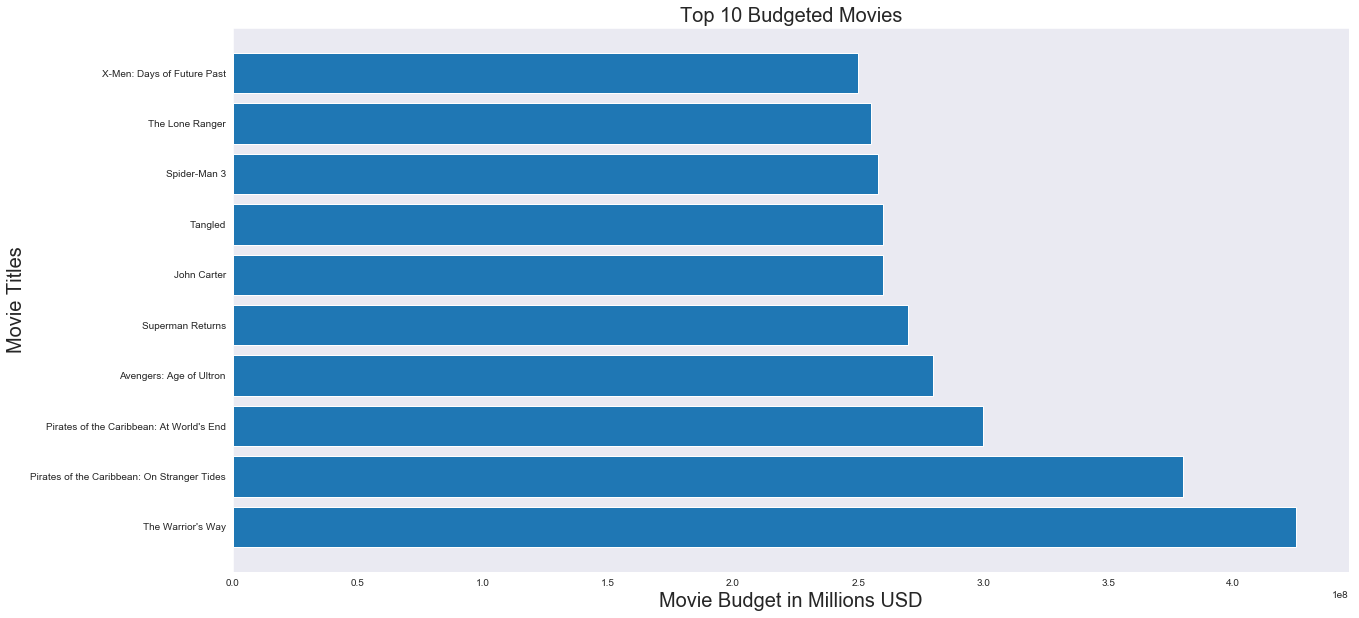

In [91]:
#lets plot out top 10 budgeted movies using matplotlib
sns.set_style("dark") #sets background darker
plt.figure(figsize=(20, 10)) #defines plot size
plt.barh(title, top) #plotting x and y axis; barh = results in horizontal bar graphs
plt.rcParams.update({'font.size': 12}) #updating font for easier display

#title and axis lables
plt.title("Top 10 Budgeted Movies",fontsize=20)
plt.xlabel('Movie Budget in Millions USD',fontsize=20)
plt.ylabel("Movie Titles",fontsize= 20)
plt.show()


### According to our data and the plot above, the top budgeted movie of all time in our database is "The Warrior's Way", followed by "Pirates of the Caribbean: On Stranger Tides". The budget is displayed in millions USD. 

---

### Question 5. What are the most succesful genres in TMDB. Plot the graph.

In [92]:
#Successfully movies we will judge by the profit it returned
#lets separate the profitable movies from the ones that are not. 
#we will extract movies that made more than or equal to 100 million dollars in profit
profit_data = df[df['profit'] >= 100000000]
profit_data.shape[0] #we have 826 movies that are successful

826

In [93]:
#lets use the def function in order to separate our genres from '|' first and then use our prf

def data_sep(column):
    data_sep = profit_data[column].str.cat(sep = '|')
    data_sep = pd.Series(data_sep.split('|')) #giving pandas series and storing the values separately
    
    #lets arrange it in descending order
    count = data_sep.value_counts(ascending = False)
    
    return count

In [94]:
genre_count = data_sep('genres')
genre_count

Action             317
Comedy             299
Adventure          278
Drama              264
Thriller           233
Family             166
Science Fiction    148
Fantasy            144
Romance            132
Crime              112
Animation          102
Mystery             66
Horror              55
Music               31
War                 29
History             14
Western             10
Documentary          1
dtype: int64

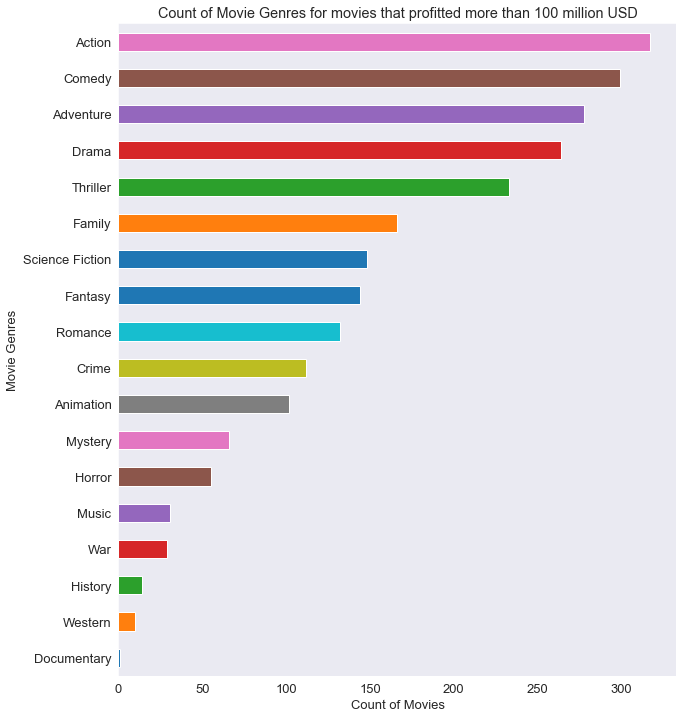

In [95]:
#lets plot the points in descending order top to bottom as we have data in same format.
genre_count.sort_values(ascending = True, inplace = True)

plotG = genre_count.plot.barh(fontsize = 13)

#title and axis labelling
plotG.set(title = 'Count of Movie Genres for movies that profitted more than 100 million USD')
plotG.set_xlabel('Count of Movies', fontsize = '13')
plotG.set_ylabel('Movie Genres', fontsize = '13')

#adjusting plot size
plotG.figure.set_size_inches(10, 12)

plt.show()

### From the given diagram and the provided list, it is observed that Action movies are the most utilized genres for profitable movies followed by Comedy. Note that some movies have overlapping movie genres, but the action movies are leading by 18 movies from the second genre

### Question 6. Identify the top 5 directors according to the popularity of the movies and how many movies have they made?

In [96]:
#we use groupby function once again and group directors and sum the popularity based per movie they directed
popdir = df.groupby(['director']).sum()['popularity']


In [97]:
#we use groupby function to group directors and count movies they made
movie_count = df.groupby(['director']).count()['original_title']

In [98]:
#using concat function to display the two variables and sorting by popularity as main
top5 = pd.concat([popdir,movie_count],axis=1).sort_values(by=['popularity'],ascending=False)[:5]
top5

,popularity,original_title
director,,
Christopher Nolan,61.955206,10
Steven Spielberg,54.378995,29
Peter Jackson,49.067904,13
Ridley Scott,46.213770,23
Quentin Tarantino,46.059995,11


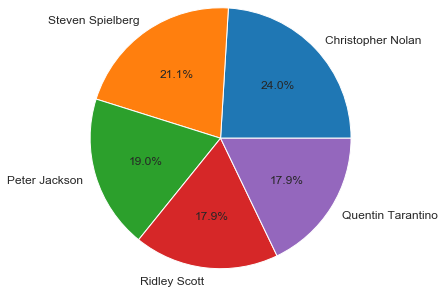

In [99]:
# Lets use a pie chart to graph our statistics from above, we we will divide the pie based on popularity rather than 
# count of movie title.

new = np.array(popdir.sort_values(ascending=False)) #creating an array for the pie graph to utilize
sizes = [24,21,19,17.92,17.90] #sizes are equivalent to the percentages
labels = ['Christopher Nolan', 'Steven Spielberg','Peter Jackson','Ridley Scott','Quentin Tarantino'] #top 5 directors
plt.pie(new[:5], labels=labels,autopct='%1.1f%%', radius=1.5)
plt.show()



### The top 5 directors are sorted by popularity based and the movie count has been listed beside column also. Christopher Nolan holds the most popular movie from the TMDB and he has only directed 10 movies. Following Nolan is Steven Spielberg with a movie count of 29. 

<a id='conclusions'></a>
## Conclusions
TDMB dataset provided great insights about movie data, from the budget, to cast, directors and many more useful information. From the research questions from this project, the concluding points noted were:
- Movie budgets have been drastically increasing with time along with the net profits being returned; we devised profit from the simple formula of revenue subtracting the budget
- The most profitable movie in this database was the Avatar with a whopping 2.5 billion dollars and the lowest profitable movie was "The Warrior's Way". Although Avatar is accurate, with further research it was shown that the statistics for the latter movie was actually incorrect.
- Data noted that movies have been getting more popular since 2010 and the returning profits are highly correlated
- we noted that Action movies were the most profitable genre in our database followed by Comedy and Adventure. This information can be useful for producers who maybe looking to invest in a movie.
- Through analysis, the top 5 directors were found. With Christopher Nolan directing 10 movies with the highest popularity rate of 61.95, followed by Steven Spielberg with 29 movies and popularity rate of 54.3
- With given analysis and data, one can note all the characteristics needed to have a profitable movie

This dataset however had problems and some of the information were not accurate. For example, the highest budgeted movie was shown to be "The Warrior's Way" with a budget of 425 million dollars, but in reality that movie budge was actually only 40 million. There are multiple errors in the dataset and limitations, dropping certain rows from cleaning might also have affected the results. 


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

### Credits:
"Python for Data Analysis" By Wes Mckinney